## Logistic Regression Part(I)

### i- generate Dataset

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X , y = make_classification(n_samples=100,
                            n_features=2,
                            n_classes=2,
                            n_clusters_per_class=1,
                            class_sep=20,
                            random_state=41,
                            n_informative=1,
                            n_redundant=0,
                            hypercube=False)

In [50]:
X[0:5]

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163]])

In [51]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

### Visualize dataset

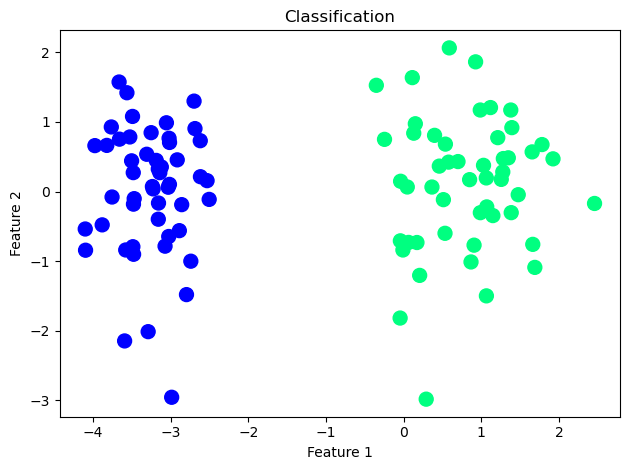

In [52]:
plt.scatter(X[:,0], X[:,1], cmap='winter', c=y, s=100)
plt.title("Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()

### Perceptron Algorithm

In [53]:
def step(z):
    return 1 if z>0 else 0 

In [54]:
def perceptron(X , y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr=0.01
    epochs = 1000
    for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = step(np.sum(np.dot(X[j], weights)))
        weights = weights + lr * (y[j]-y_hat) *X[j]
    return weights[0], weights[1:]

In [55]:
bias , weights = perceptron(X, y)
print("W0: ", bias)
print("W1 and W2 : ", weights)

W0:  1.2000000000000002
W1 and W2 :  [1.01435895 0.55517218]


### Visualize Result

(-3.0, 2.0)

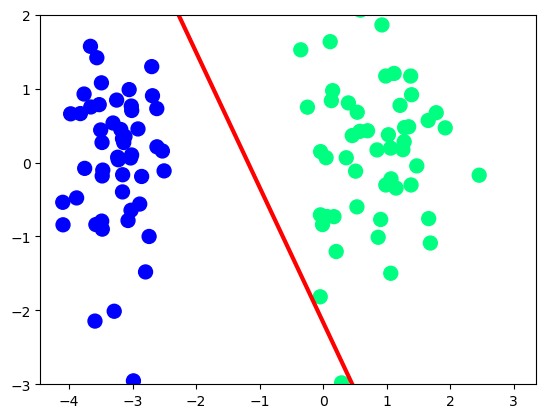

In [56]:
m = -(weights[0]/weights[1])
b = -(bias/weights[1])
x_input = np.linspace(-3,3, 100)
y_input = m*x_input + b

plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1],  cmap='winter', c=y, s=100)
plt.ylim(-3,2)

### Sklearn;s Logistic regression Model

In [57]:
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [58]:
print("W0: ", model.intercept_)
print("W1 and W2 : ", model.coef_)

W0:  [3.13649441]
W1 and W2 :  [[2.36687798 0.02178765]]


(-3.0, 2.0)

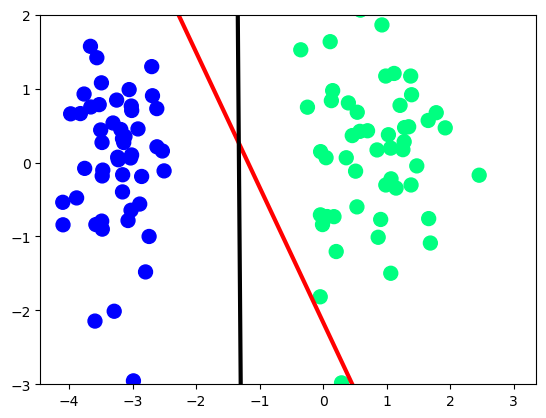

In [59]:
m = -(model.coef_[0][0]/model.coef_[0][1])
b = -(model.intercept_/model.coef_[0][1])
x_input1 = np.linspace(-3,3, 100)
y_input1 = m*x_input + b

plt.plot(x_input, y_input, color='red', linewidth=3) #Perceptron Algorithm
plt.plot(x_input1, y_input1, color='black', linewidth=3) #LogisticRegression()
plt.scatter(X[:,0], X[:,1],  cmap='winter', c=y, s=100)
plt.ylim(-3,2)

## Sigmoid Rather then Step

In [66]:
def perceptron_sigmoid(X , y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr=0.01
    epochs = 10000
    for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.sum(np.dot(X[j], weights)))
        weights = weights + lr * (y[j]-y_hat) *X[j]
    return weights[0], weights[1:]

In [65]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [67]:
bias_s , weights_s = perceptron_sigmoid(X, y)
print("W0: ", bias_s)
print("W1 and W2 : ", weights_s)

W0:  2.831746534364332
W1 and W2 :  [2.82853634 0.11363906]


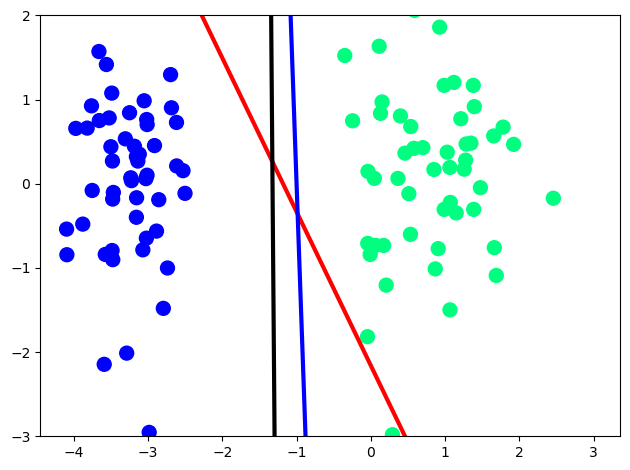

In [68]:
m = -(weights_s[0]/weights_s[1])
b = -(bias_s/weights_s[1])
x_input2 = np.linspace(-3,3, 100)
y_input2 = m*x_input + b

plt.plot(x_input, y_input, color='red', linewidth=3) #Perceptron Algorithm
plt.plot(x_input1, y_input1, color='black', linewidth=3)# LogiticRegression()
plt.plot(x_input2, y_input2, color='blue', linewidth=3)#Sigmoid

plt.scatter(X[:,0], X[:,1],  cmap='winter', c=y, s=100)
plt.ylim(-3,2)
plt.tight_layout()